In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt



In [2]:
df=pd.read_csv("Salary_Data.csv.xls")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


Text(0, 0.5, 'Salary')

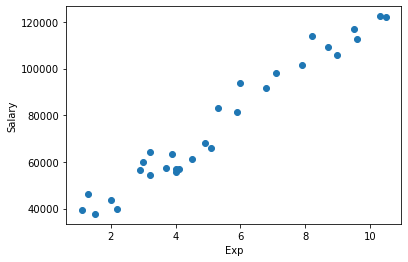

In [3]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.xlabel("Exp")
plt.ylabel("Salary")

### Spliting of the x and y columns

In [4]:
x=df.iloc[:,0:1].values
y=df.iloc[:,1:2].values


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=.2,random_state=2)


In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [7]:
X_test


array([[1.3],
       [1.1],
       [4.5],
       [3.7],
       [7.1],
       [6. ]])

In [8]:
Y_test

array([[46205.],
       [39343.],
       [61111.],
       [57189.],
       [98273.],
       [93940.]])

In [9]:
lr.predict(X_test[0].reshape(1,1))

array([[36833.63210301]])

Text(0.5, 1.0, 'Exp Vs Salary')

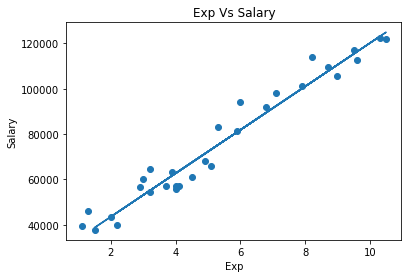

In [10]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.plot(X_train,lr.predict(X_train))
plt.xlabel("Exp")
plt.ylabel("Salary")
plt.title("Exp Vs Salary")


In [11]:
lr.coef_

array([[9569.58688543]])

In [12]:
lr.intercept_

array([24393.16915195])

# Linear Regression using Custom Class


In [13]:
class MeraLR:
    def _init_(self):
        self.m=0
        self.b=0
    def fit(self,X_train,Y_train):
        num=0
        den=0
        for i in range (X_train.shape[0]):
            num=num+ ((X_train[i]-X_train.mean())*(Y_train[i]-Y_train.mean()))
            den=den+ ((X_train[i]-X_train.mean())*(X_train[i]-X_train.mean()))
        self.m=num/den
        self.b=Y_train.mean()-(self.m*X_train.mean())
        print(self.m)
        print(self.b)
    def predict(self,X_test):
        return self.m*X_test+self.b

In [14]:
MLR=MeraLR()


In [15]:
MLR.fit(X_train,Y_train)

[9569.58688543]
[24393.16915195]


In [16]:
MLR.predict(X_test[0])

array([36833.63210301])

Text(0.5, 1.0, 'Exp Vs Salary')

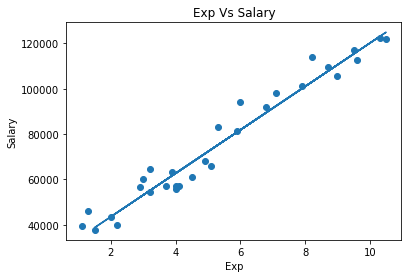

In [17]:
plt.scatter(df["YearsExperience"],df["Salary"])
plt.plot(X_train,lr.predict(X_train))
plt.xlabel("Exp")
plt.ylabel("Salary")
plt.title("Exp Vs Salary")


###### Note : The Intercept and the Coef i.e. value of m and b is same as of the result of the custom class

# Measuring the Performance 

1- MAE 
2- MSE
3- RMSE
4- R2 score
5- Adjusted R2 score 

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [36]:
y_pred=lr.predict(X_test)
y_pred

array([[36833.63210301],
       [34919.71472592],
       [67456.3101364 ],
       [59800.64062805],
       [92337.23603852],
       [81810.69046455]])

In [22]:
print(mean_absolute_error(Y_test,y_pred))

6802.779572073901


In [23]:
print(mean_squared_error(Y_test,y_pred))

56137509.997825585


In [24]:
print(np.sqrt(mean_squared_error(Y_test,y_pred)))

7492.496913434505


In [27]:
print(r2_score(y_pred,Y_test))

0.8758881970900052


In [30]:
X_test.shape[0]


6

In [37]:
1-((1-0.87)*(6-1)/(6-1-1))

0.8375